In [19]:
%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 999
#difference are all in the decimal places
from preprocessing_unique import create_testdata
import matplotlib.pyplot as plt

In [29]:
#dataset 1
features_train,windspeed_train,features_test,windspeed_test=create_testdata('50',2)


In [30]:
features_train['speed']=windspeed_train
features_test['speed']=windspeed_test

In [31]:
c=features_train['Country'].value_counts()

Text(0.5, 1.0, 'Country count for trainval data set in data set 2')

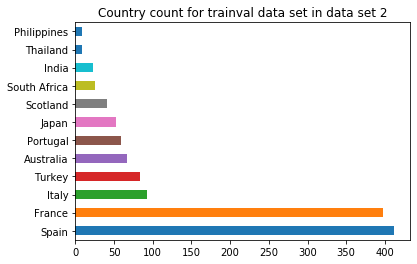

In [32]:
c.plot(kind='barh',rot=0)
plt.title('Country count for trainval data set in data set 2')

Text(0.5, 1.0, 'Country count for test data set in data set 2')

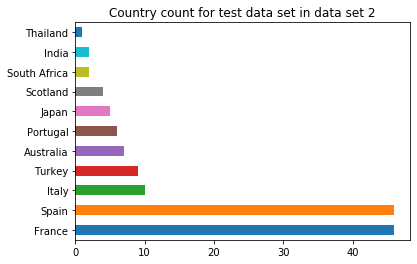

In [33]:
c_test=features_test['Country'].value_counts()
c_test.plot(kind='barh',rot=0)
plt.title('Country count for test data set in data set 2')

## now build a naive detector that takes the mean of each country and predict for the test set

In [102]:
country_group=features_train.groupby(['Country']).mean()

In [103]:
country_group

,Distance to the closest Airport (kms),Distance to the closest Builtup (kms),Distance to the closest roads (kms),Distance to the closest Agricultural area (kms),Distance to the closest Settlement (kms),Distance to the closest Vegetation (kms),Distance to the closest Water (kms),Distance to the closest Forest (kms),Distance to the closest Grassland (kms),Lat,Long,speed
Country,,,,,,,,,,,,
Australia,17.863161,162.078981,4.338650,6.823254,12.401758,24.316741,18.120761,4.739296,6.447562,-34.659192,137.943571,8.381896
France,202.089691,22.818319,5.419725,5.419044,2.590394,27.306875,13.039370,3.252818,4.001513,48.148601,2.286217,8.032804
India,83.737716,44.143920,9.376301,9.382892,9.647899,35.822443,9.529307,15.897551,7.609234,14.718798,75.255039,7.520402
Italy,107.006368,21.534226,4.967014,5.768481,3.581149,16.483711,13.170249,3.938146,3.172436,39.913824,14.367535,5.384469
Japan,37.883398,32.056326,2.625231,2.024109,3.413729,62.632736,3.359854,3.543213,17.529590,38.177699,138.583361,7.560421
Philippines,28.163200,62.472986,4.083894,3.399115,12.398432,29.783906,4.221811,2.077636,60.991715,15.378866,121.359346,9.025809
Portugal,72.001408,25.276770,5.858849,2.108943,4.599753,14.272202,12.493287,2.776279,12.614722,40.195362,-8.239987,7.541821
Scotland,88.775246,27.477800,7.297502,3.449550,7.882149,8.049216,6.894114,1.970106,2.298267,56.400567,-3.701475,9.034414
South Africa,63.618475,70.547073,2.038879,4.718164,11.804420,17.310382,20.596226,5.221896,5.043467,-32.724230,22.929537,7.282951


In [104]:
pred=country_group['speed']

In [105]:
pred.name='prediction'

In [106]:
pred.name

'prediction'

In [107]:
#for 'Windspeed_50 (m/s)'
features=['Country','speed']
x1=features_test[features]

In [108]:
x1=x1.join(pred, on='Country')


In [109]:
#now caclulate MSE error
import numpy as np
error=x1['speed'].values-x1['prediction'].values
MSE=np.mean(np.square(error))

In [110]:
MSE

0.7063751150226464